In [14]:
#차영상
#영상에서 영상을 빼면 두 영상의 차이 즉 변화를 알 수 있음.
#차영상을 구할 시에는 두 영상을 무턱대고 빼기 연산하면 
#음수가 나올 수 있으므로 절대 값을 구해야함.

import numpy as np, cv2

#연산에 필요한 영상을 읽고 grayscale 로 변환
img1 = cv2.imread('./img/robot_arm1.jpg')
img2 = cv2.imread('./img/robot_arm2.jpg')
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#두영상의 절대 값 차 연산
diff = cv2.absdiff(img1_gray, img2_gray)
#diff는 두 영상의 차이점 
print(diff)

#차 영상을 극대화하기 위해 스레시홀드 처리 및 컬러로 번환
_, diff = cv2.threshold(diff, 1,255, cv2.THRESH_BINARY)

diff_red = cv2.cvtColor(diff, cv2.COLOR_BayerGR2BGR)
#print(diff_red)
diff_red[:,:,2] = 0 #2는 색상

#두번째 이미지에 변화 부분 표시
spot = cv2.bitwise_xor(img2, diff_red)

#결과영상 출력
cv2.imshow('diff_red',diff_red)
cv2.imshow('img1',img1)
cv2.imshow('img2',img2)
cv2.imshow('diff',diff)
cv2.imshow('spot',spot)
cv2.waitKey()
cv2.destroyAllWindows()

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [17]:
#원하는 영역만 떼어내기 위해 마스크 사용
"""
배경이 투명한 영상은 4개 채널 중 마지막 채널은 배경에 해당하는 영역은 0 값을 전경에 해당하는
영역은 0값을, 전경에 해당하는 영역은 255값을 가짐

cv2.IMREAD_UNCHANGED
이미지파일을 alpha channel까지 포함하여 읽어 들입니다.
"""
import cv2
import numpy as np

#합성에 사용할 영상 읽기, 전경 영상은 4채널 png 파일
img_fg = cv2.imread('./img/opencv_logo.png', cv2.IMREAD_UNCHANGED)
img_bg = cv2.imread('./img/girl.jpg')

#알파 채널을 이용해 마스크와 역마스크 생성
_, mask = cv2.threshold(img_fg[:,:,3],1,255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

#ROI 잘라내기
img_fg = cv2.cvtColor(img_fg, cv2.COLOR_BGRA2BGR)
h, w = img_fg.shape[:2]
roi = img_bg[10:10+h, 10:10+w]

#마스크를 이용해서 오려내기
masked_fg = cv2.bitwise_and(img_fg, img_fg, mask=mask)
masked_bg= cv2.bitwise_and(roi, roi, mask=mask_inv)

#이미지 합성
added = masked_fg + masked_bg
img_bg[10:10+h, 10:10+w] = added

#결과영상 출력
cv2.imshow('mask',mask)
cv2.imshow('mask_inv',mask_inv)
cv2.imshow('masked_fg',masked_fg)
cv2.imshow('masked_bg',masked_bg)
cv2.imshow('added', added)
cv2.imshow('result', img_bg)
cv2.waitKey()
cv2.destroyAllWindows()

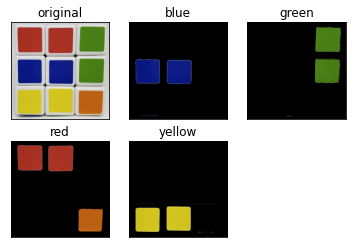

In [18]:
"""
HSV로 변환하면 원하는 색상 범위의 것만 골라낼 수 있음

#특정 범위값을 만족하는 마스크 만들기

cv2.inRange(img, from, to)
img:입력영상
from:범위의 시작과 배열
to:범위의 끝 배열
dst:img가 from~to에 포함되면 255, 아니면 0을 픽셀값으로 하는 배열 

#이 함수의 반환 결과는 바이너리 스케일이 되어 코드 cv2.bitwise_and()함수의
 mask로 사용하기 적합해짐
 
#이와같이 색상을 이용한 마스크를 이용하는 것이 크로마 키의 원리
"""

import cv2
import numpy as np
import matplotlib.pylab as plt

#큐브 영상을 읽어서 HSV로 변환
img = cv2.imread("./img/cube.jpg")
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

#색상별 영역 지정
blue1 = np.array([90,50,50])
blue2 = np.array([120,255,255])
green1 = np.array([45,50,50])
green2 = np.array([75,255,255])
red1 = np.array([0,50,50])
red2 = np.array([15, 255, 255]) #빨강은 0-15
red3 = np.array([165, 50, 50]) #빨강은 165-180으로 나뉨 
red4 = np.array([180,255,255]) 
yellow1 = np.array([20,50,50])
yellow2 = np.array([35,255,255])

#색상에 따른 마스크 생성
mask_blue = cv2.inRange(hsv, blue1, blue2)
mask_green = cv2.inRange(hsv, green1, green2)
mask_red = cv2.inRange(hsv, red1, red2)
mask_red2 = cv2.inRange(hsv, red3, red4)
mask_yellow = cv2.inRange(hsv, yellow1, yellow2)

#색상별 마스크로 색상만 추출
res_blue = cv2.bitwise_and(img,img, mask=mask_blue)
res_green = cv2.bitwise_and(img,img, mask=mask_green)
res_red1 = cv2.bitwise_and(img,img, mask=mask_red)
res_red2 = cv2.bitwise_and(img,img, mask=mask_red2)
res_red = cv2.bitwise_or(res_red1, res_red2)
res_yellow = cv2.bitwise_and(img,img, mask=mask_yellow)

imgs = {'original': img, 'blue': res_blue, 'green':res_green, 'red':res_red, 'yellow':res_yellow}

for i, (k,v) in enumerate(imgs.items()):
    plt.subplot(2,3, i+1)
    plt.title(k)
    plt.imshow(v[:,:,::-1])
    plt.xticks([]); plt.yticks([])
plt.show()

In [19]:
#HSV 색상으로 마스킹
import cv2
import numpy as np
import matplotlib.pylab as plt

#크로마 키 영상과 합성할 영상 읽기
img1 = cv2.imread("./img/man_chromakey.jpg")
img2 = cv2.imread("./img/street.jpg")

#ROI 선택을 위한 좌표 계산(가운데 위치하기 위한)
height1, width1 = img1.shape[:2]
height2, width2 = img2.shape[:2]
x = (width2-width1)//2
y = height2-height1
w = x + width1
h = y + height1

#크로마 키 배경 영상에서 크로마 키가 있을 법한 영역을 10픽셀 정도로 지정
chromakey = img1[:10, :10, :]
offset = 20

#크로마키 영역과 영상 전체를 HSV로 변경
hsv_chroma = cv2.cvtColor(chromakey, cv2.COLOR_BGR2HSV)
hsv_img = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)

#크로마 키 영역의 H 값에서 offset 만큼 여유를 두어서 범위 지정
#offset 값은 여러차례 시도 후 결정
chroma_h = hsv_chroma[:,:, 0]
lower = np.array([chroma_h.min()-offset, 100, 100])
upper = np.array([chroma_h.max()+offset, 255, 255])

#마스크 생성 및 마스킹 후 합성
mask=cv2.inRange(hsv_img, lower, upper)
mask_inv = cv2.bitwise_not(mask)
roi = img2[y:h, x:w]
fg = cv2.bitwise_and(img1, img1, mask=mask_inv)
bg = cv2.bitwise_and(roi, roi, mask=mask)
img2[y:h, x:w] = fg+bg

#결과 출력
cv2.imshow('chromakey0', img1)
cv2.imshow('added', img2)
cv2.imshow('chromakey',chromakey)  #####
cv2.waitKey()
cv2.destroyAllWindows()


In [21]:
"""
dst = cv2.seamlessClone(src, dst, mask, coord, flags[, output])
src:입력영상, 일반적으로 전경
dst:입력영상, 일반적으로 배경
mask:마스크, src에서 합서앟고자 하는 영역은 255, 나머지는 0
coord:src가 놓여지기 원하는 dst의 좌표(중앙)
flags:합성방식
cv2.NORMAL_CLONE:입력원본유지
cv2.MIXED_CLONE:입력과 대상을 혼합
output: 합성결과
dst:합성결과
"""
import cv2
import numpy as np
import matplotlib.pylab as plt

#합성 대상 영상 읽기
img1 = cv2.imread("./img/drawing.jpg")
img2 = cv2.imread("./img/my_hand.jpg")

#마스크 생성, 합성할 이미지 전체 영역을 255로 세팅
mask = np.full_like(img1,255)

#합성대상 좌표계산(img2의 중앙)
height, width = img2.shape[:2]
center = (width//2, height//2)

#seamlessClone으로 합성
normal = cv2.seamlessClone(img1, img2, mask, center, cv2.NORMAL_CLONE)
mixed = cv2.seamlessClone(img1, img2, mask, center, cv2.MIXED_CLONE)

#결과출력
cv2.imshow('normal', normal)
cv2.imshow('mixed', mixed)
cv2.waitKey()
cv2.destroyAllWindows()

In [16]:
#
#배경은 반드시 흰색 이어야 함################################

#사과를 내리는 법을 모르겠음
"""
dst = cv2.seamlessClone(src, dst, mask, coord, flags[, output])
src:입력영상, 일반적으로 전경
dst:입력영상, 일반적으로 배경
mask:마스크, src에서 합서앟고자 하는 영역은 255, 나머지는 0
coord:src가 놓여지기 원하는 dst의 좌표(중앙)
flags:합성방식
cv2.NORMAL_CLONE:입력원본유지
cv2.MIXED_CLONE:입력과 대상을 혼합
output: 합성결과
dst:합성결과
"""
import cv2
import numpy as np
import matplotlib.pylab as plt

#합성 대상 영상 읽기
img1 = cv2.imread("./apple.jpg")
img2 = cv2.imread("./eco_bag.jpg")

#마스크 생성, 합성할 이미지 전체 영역을 255로 세팅
mask = np.full_like(img1,255)

#합성대상 좌표계산(img2의 중앙)
height, width = img2.shape[:2]
center = (width//2, height//2)

#seamlessClone으로 합성
normal = cv2.seamlessClone(img1, img2, mask, center, cv2.NORMAL_CLONE)
mixed = cv2.seamlessClone(img1, img2, mask, center, cv2.MIXED_CLONE)

#결과출력
cv2.imshow('normal', normal)
cv2.imshow('mixed', mixed)
cv2.waitKey()
cv2.destroyAllWindows()

In [1]:
#사진 출력하는데 이상하게 교재git으로 돌려봐도 나는 오류남
import cv2
import numpy as np
import matplotlib.pylab as plt

#이미지를 그레이 스케일로 읽기 및 출력하기
img = cv2.imread("./img-20210913T062241Z-001/img/mountain.jpg", cv2.IMREAD_GRAYSCALE)
cv2.imshow('img',img)

#히스토그램 계산 및 그리기
hist = cv2.calcHist([img], [0], None, [256], [0,255])
plt.plot(hist)

print(hist.shape)
print(hist.sum(), img.shape)
plt.show()

error: OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-1i5nllza\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


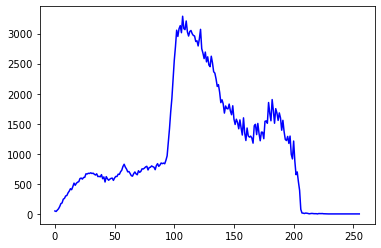

In [2]:
import cv2
import numpy as np
import matplotlib.pylab as plt

#이미지 읽기 및 출력
img = cv2.imread("./img/mountain.jpg", cv2.IMREAD_GRAYSCALE)
cv2.imshow('img',img)

#히스토그램 계산 및 그리기
channels = cv2.split(img)
colors = ('b','g','r')
for (ch, color) in zip (channels, colors):
    hist = cv2.calcHist([ch], [0], None, [256], [0,256])
    plt.plot(hist, color = color)
plt.show()

cv2.waitKey()
cv2.destroyAllWindows()

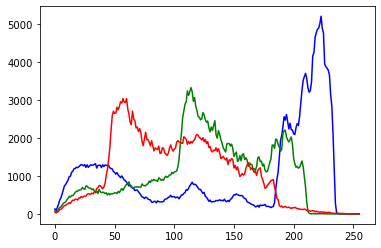

In [1]:
import cv2
import numpy as np
import matplotlib.pylab as plt

#--① 이미지 읽기 및 출력
img = cv2.imread('./img/mountain.jpg')
cv2.imshow('img', img)

#--② 히스토그램 계산 및 그리기
channels = cv2.split(img)
colors = ('b', 'g', 'r')
for (ch, color) in zip (channels, colors):
    hist = cv2.calcHist([ch], [0], None, [256], [0, 255])
    plt.plot(hist, color = color)
plt.show()

#밑의 코드 반드시 넣어야 함
cv2.waitKey()
cv2.destroyAllWindows()

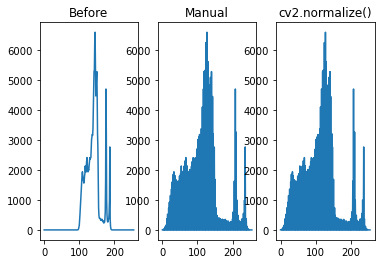

In [3]:
#노멀라이즈 ##############공식도 볼것 155p

"""
cv2.normalize(src, dst, alpha, beta, type_flag)
src:
dst:
alpha:
beta:
type_flag:
    cv2.NORM_MINMAX: alpha와 beta구간으로 노멀라이즈
    cv2.NORM_L1:전체 합으로 나누기, alpha=노멀라이즈
    cv2.NORM_L2:단위 벡터(unit vector)로 노멀라이즈
    cv2.NORM_INF:최대값으로 나누기
    
"""

import cv2
import matplotlib.pylab as plt
import numpy as np

#그레이스케일로 영상읽기
img = cv2.imread('./img/abnormal.jpg', cv2.IMREAD_GRAYSCALE)

#직접 연산한 정규화
img_f = img.astype(np.float32)
img_norm = ((img_f - img_f.min()) * (255) / (img_f.max() - img_f.min()))
img_norm = img_norm.astype(np.uint8)
img_norm2 = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)

#히스토그램 계산
hist = cv2.calcHist([img], [0], None, [256], [0,255])
hist_norm = cv2.calcHist([img_norm], [0], None, [256], [0,255])
hist_norm2 = cv2.calcHist([img_norm2], [0], None, [256], [0,255])

cv2.imshow('Before', img)
cv2.imshow('Manual', img_norm)
cv2.imshow('cv2.normalize()', img_norm2)

hists = {'Before' :hist , 'Manual':hist_norm, 'cv2.normalize()':hist_norm2}
for i, (k,v) in enumerate(hists.items()):
    plt.subplot(1,3,i+1)
    plt.title(k)
    plt.plot(v)
plt.show()
    
#밑의 코드 반드시 넣어야 함
cv2.waitKey()
cv2.destroyAllWindows()

#두번째 것이 제일 선명하네

In [6]:
#내건 안됨 

#노멀라이즈는 분포가 한곳에 집중되어 있을 경우에는 효과적이지만 
#그 집중된 영역에서 멀리 떨어진 값이 있을 경우에는 효과가 없음
#즉 평탄화는 차이가 많이 나는 컬러이미지가 어울림
#앞에서 한건 흑백이라 노멀라이즈가 적합한 거였음

#그레이스케일 이퀄라이즈 적용
import cv2
import numpy as np
import matplotlib.pylab as plt

#대상 영상을 그레이 스케일로 읽기
img = cv2.imread('./img/yate.jpg', cv2.IMREAD_GRAYSCALE)
rows, cols = img.shape[:2]

#이퀄라이즈 연산을 직접 적용
hist = cv2.calcHist([img], [0], None, [256], [0, 256]) 
cdf = hist.cumsum()
cdf_m = np.ma.masked_equal(cdf, 0)
cdf_m = (cdf_m - cdf_m.min()) / (rows * cols) * 255
cdf = np.ma.filled(cdf_m, 0).astype('uint8')
img2 = cdf[img]

#OpenCV API로 이뭘라이즈 히스토그램 적용
img3 = cv2.equalizeHist(img)

#이퀄라이즈 결과 히스토그램 계산
hist2 = cv2.calcHist([img2], [0], None, [256], [0,256])
hist3 = cv2.calcHist([img3], [0], None, [256], [0,256])

#결과출력
cv2.imread('Before', img)
cv2.imread('Manual', img2)
cv2.imread('cv2.equalizeHist', img3)
hists = {'before':hist, 'manual':hist2, 'cv2.equalizeHist':hist3}
for i, (k,v) in enumerate(hists.items()):
    plt.subplot(1,3,i+1)
    plt.title(k)
    plt.plot(v)
plt.show()


#밑의 코드 반드시 넣어야 함
cv2.waitKey()
cv2.destroyAllWindows()

#두번째 것이 제일 선명하네

TypeError: Argument 'flags' is required to be an integer

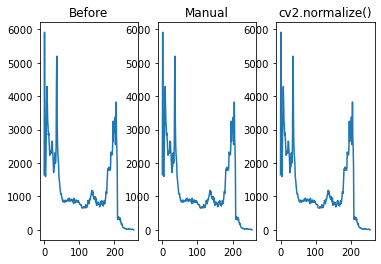

In [5]:
#대상 영상을 그레이 스케일로 읽기
img = cv2.imread('C:/Users/admin/Downloads/img-20210913T062241Z-001/img/yate.jpg', cv2.IMREAD_GRAYSCALE)
rows, cols = img.shape[:2]

#--② 직접 연산한 정규화
img_f = img.astype(np.float32)
img_norm = ((img_f - img_f.min()) * (255) / (img_f.max() - img_f.min()))
img_norm = img_norm.astype(np.uint8)

#--③ OpenCV API를 이용한 정규화
img_norm2 = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)

#--④ 히스토그램 계산
hist = cv2.calcHist([img], [0], None, [256], [0, 255])
hist_norm = cv2.calcHist([img_norm], [0], None, [256], [0, 255])
hist_norm2 = cv2.calcHist([img_norm2], [0], None, [256], [0, 255])

cv2.imshow('Before', img)
cv2.imshow('Manual', img_norm)
cv2.imshow('cv2.normalize()', img_norm2)

hists = {'Before' : hist, 'Manual':hist_norm, 'cv2.normalize()':hist_norm2}
for i, (k, v) in enumerate(hists.items()):
    plt.subplot(1,3,i+1)
    plt.title(k)
    plt.plot(v)
plt.show()

#밑의 코드 반드시 넣어야 함
cv2.waitKey()
cv2.destroyAllWindows()

#두번째 것이 제일 선명하네

In [7]:
#컬러 이미지에 대한 이퀄라이즈 적용
import numpy as np, cv2

#이미지 읽기 BGR스케일
img = cv2.imread('./img/yate.jpg')

#컬러 스케일을 BGR에서 YUV로 변경
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

#YUV컬러 스케일의 첫번째 채널에 대해서 이퀄라이즈 적용
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])

#컬러스케일을 YUV에서 BGR로 변경
img2 = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

cv2.imshow('before', img)
cv2.imshow('after', img2)
cv2.waitKey()
cv2.destroyAllWindows()

In [8]:
#opencv하고 tkinter를 이용한 프로그램 만들기

"""
gui가 있다고 가정하고 
이미지 두개 선택
배우고 있는 합성이나 
특정부분 추출같은것을 옵션으로 줘서
원하는 효과를 이미지에 적용한다던지

이후 객체인식하고 추적하는 것을 할텐데

ex) 이미지 내에 객체가 몇개나 있는지 이런것들을 분석해주는 프로그램을 만들겠다

UI에 적절하게 적용해서 이것을 이미지에 적용한 것을 보여주는 프로그램

"""

'\ngui가 있다고 가정하고 \n이미지 두개 선택\n배우고 있는 합성이나 \n특정부분 추출같은것을 옵션으로 줘서\n원하는 효과를 이미지에 적용한다던지\n\n이후 객체인식하고 추적하는 것을 할텐데\n\nex) 이미지 내에 객체가 몇개나 있는지 이런것들을 분석해주는 프로그램을 만들겠다\n\nUI에 적절하게 적용해서 이것을 이미지에 적용한 것을 보여주는 프로그램\n\n'

In [14]:
#CLAHE
"""
영상전체에 이퀄라이즈를 적용했을 때 너무 밝은 부분이 날아가는 현상을 막기 위해 영상을 일정한 영역으로 나눠서
이퀄라이즈를 적용하는것, 노이즈가 증폭되는 것을 막기위해 어느 히스토그램 계급이든 지정된 제한 값을 넘으면
그 픽셀은 다른 계급으로 배분하고나서 이퀄라이즈 적용

#clahe = cv2.createCLAHE(clipLimit, tileGridSize)  #핵심
#clipLimit : contrast 제한 경계값, 기본 40.0
#tileGridSize: 영역크기, 기본 8x8
#clahe : 생성된 CLAHE 객체
#clahe.apply(src) : clahe 적용 #핵심
#src는 입력 영상
"""
import cv2
import numpy as np
import matplotlib.pyplot as plt

#이미지를 읽어서 YUV 컬러스페이스로 변경
img = cv2.imread('./img/bright.jpg')
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

#밝기채널에 대해 이퀄라이즈 적용
img_eq = img_yuv.copy()
img_eq[:,:,0] = cv2.equalizeHist(img_eq[:,:,0])
img_eq = cv2.cvtColor(img_eq, cv2.COLOR_YUV2BGR)

#밝기 채널에 대해서 CLAHE 적용
img_clahe = img_yuv.copy()
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8)) #CLAHE 생성
img_clahe[:,:,0] = clahe.apply(img_clahe[:,:,0])           #CLAHE 적용
img_clahe = cv2.cvtColor(img_clahe, cv2.COLOR_YUV2BGR)

#결과출력
cv2.imshow('Before', img) #원본
cv2.imshow('CLAHE', img_clahe)
cv2.imshow('equalizeHist', img_eq)
cv2.waitKey()
cv2.destroyAllWindows()

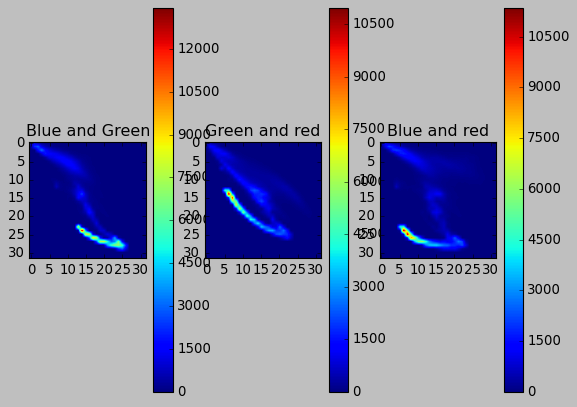

In [18]:
#2D 히스토그램
import cv2
import matplotlib.pylab as plt ####

plt.style.use('classic')
img = cv2.imread('./img/mountain.jpg')

plt.subplot(131)
hist = cv2.calcHist([img], [0,1], None, [32,32], [0,256,0,256])
p = plt.imshow(hist)
plt.title('Blue and Green')
plt.colorbar(p)

plt.subplot(132)
hist = cv2.calcHist([img], [1,2], None, [32,32], [0,256,0,256])
p = plt.imshow(hist)
plt.title('Green and red')
plt.colorbar(p)

plt.subplot(133)
hist = cv2.calcHist([img], [0,2], None, [32,32], [0,256,0,256])
p = plt.imshow(hist)
plt.title('Blue and red')
plt.colorbar(p)

plt.show()

#논리연산의 and와 같음

In [15]:
#역투영
"""
2차원 히스토그램과 HSV 컬러 스페이스를 이용하면 색상으로 특정 물체나 사물의 일부분을 배경에서 분리할 수 있음
다만 비슷한 색상으로 이미지가 이루어져있을 때 깔끔하게 배경을 구분해 낼 수 없음
전경과 배경의 색상이 명확히 구분될 때 용이
"""

#마우스로 선택한 영역의 물체 배경제거
import cv2
import numpy as np
import matplotlib.pyplot as plt

win_name = 'back_projection'
img = cv2.imread('./img/pump_horse.jpg')
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
draw = img.copy()

#역투영된 결과를 마스킹해서 결과를 출력하는 함수
def masking(bp, win_name):
    disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
    cv2.filter2D(bp,-1,disc,bp)
    _, mask = cv2.threshold(bp, 1, 255, cv2.THRESH_BINARY)
    result = cv2.bitwise_and(img, img, mask=mask)
    cv2.imshow(win_name, result)
    
#직접구현한 역투영 함수
def backProject_manual(hist_roi):
    #전체 영상에 대한 H,S 히스토그램 계산
    hist_img = cv2.calcHist([hsv_img], [0,1], None,[180,256], [0,180,0,256])
    #선택 영역과 전체 영상에 대한 히스토그램 비율 계산
    hist_rate = hist_roi/(hist_img + 1)
    #비율에 맞는 픽셀 값 매핑
    h,s,v = cv2.split(hsv_img)
    bp = hist_rate[h.ravel(), s.ravel()]
    bp = np.minimum(bp, 1)
    bp = bp.reshape(hsv_img.shape[:2])
    cv2.normalize(bp,bp, 0, 255, cv2.NORM_MINMAX)
    bp = bp.astype(np.uint8)
    #역투영 결과로 마스킹해서 결과 출력
    masking(bp,'result_manual')
    
#openCV API로 구현한 함수
def backProject_cv(hist_roi):
    #역투영 함수 호출
    bp = cv2.calcBackProject([hsv_img], [0, 1], hist_roi,  [0, 180, 0, 256], 1)
    #역투영 결과로 마스킹해서 결과출력
    masking(bp, 'result_cv')
    
#ROI선택
(x,y,w,h) = cv2.selectROI(win_name, img, False)
if w > 0 and h > 0:
    roi = draw[y:y+h, x:x+w]
    cv2.rectangle(draw, (x, y), (x+w, y+h), (0,0,255), 2)
    #선택한 ROI를 HSV컬러 스페이스로 변경
    hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
    #H,S 채널에 대한 히스토그램 계산
    hist_roi = cv2.calcHist([hsv_roi],[0, 1], None, [180, 256], [0, 180, 0, 256] )
    #ROI의 히스토그램을 매뉴얼 구현함수와 OpenCV를 이용하는 함수에 각각 전달
    backProject_manual(hist_roi)
    backProject_cv(hist_roi)
cv2.imshow(win_name, draw)
cv2.waitKey()
cv2.destroyAllWindows()

"""
cv2.calcBackProject(img, channel, hist, ranges, scale)
img: 입력영상 [img]처럼 리스트로 감싸서 표현
channel:처리할 채널,리스트로 감싸서 표현 
> 1채널:[0], 2채널:[0,1], 3채널:[0,1,2]
hist:역투영에 사용할 히스토그램
ranges:픽셀이 가질 수 있는 값의 범위
scale:결과에 적용할 배율 계수
"""

CORREL    	img1:   1.00	img2:   0.70	img3:   0.56	img4:   0.23	
CHISQR    	img1:   0.00	img2:  67.33	img3:  35.71	img4:1129.49	
INTERSECT 	img1:   1.00	img2:   0.54	img3:   0.40	img4:   0.18	
BHATTACHARYYA	img1:   0.00	img2:   0.48	img3:   0.47	img4:   0.79	


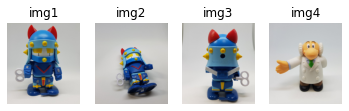

In [2]:
#내 컴퓨터에서 결과는 나오는데 오류남
#카이제곱일때는 0일 때 일치
#flag 값에서 각각 방법론을 돌아가며 실행하게 됨

"""
cv2.compareHist(hist1, hist2, method)
#hist1, hist2 : 비교할 2개의 히스토그램, 크기와 차원이 같아야 함
#method : 비교 알고리즘 선택 플래그 상수
 > cv2.HISTCMP_CORREL: 상관관계 (1은 완전일치, -1은 최대 불일치, 0은 무관계)
 > cv2.HISTCMP_CHISQR: 카이제곱(0은 완전일치, 큰값(미정)은 최대불일치)
 > cv2.HISTCMP_INTERSECT:교차(1일때 완전일치, 0일떄 최대불일치(1로 정규화한 경우) )
 > cv2.HISTCMP_BHATTACHARYYA:바타차야(0이면 완전일치, 1이면 최대불일치)
 > cv2.HISTCMP_HELLINGER: HISTCMP_BHATTACHARYYA와 동일
"""

#히스토그램 비교
import cv2, numpy as np
import matplotlib.pylab as plt

img1=cv2.imread('./img/taekwonv1.jpg')
img2=cv2.imread('./img/taekwonv2.jpg')
img3=cv2.imread('./img/taekwonv3.jpg')
img4=cv2.imread('./img/dr_ochanomizu.jpg')

cv2.imshow('query', img1)
imgs = [img1, img2, img3, img4]
hists = []
for i, img in enumerate(imgs) :
    plt.subplot(1,len(imgs),i+1)
    plt.title('img%d'% (i+1))
    plt.axis('off') 
    plt.imshow(img[:,:,::-1])
    #각 이미지를 HSV로 변환
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    #H,S 채널에 대한 히스토그램 계산
    hist = cv2.calcHist([hsv], [0,1], None, [180,256], [0,180,0, 256])
    #0-1로 정규화
    cv2.normalize(hist, hist, 0, 1, cv2.NORM_MINMAX)
    hists.append(hist)
    
query = hists[0]
methods = {'CORREL' :cv2.HISTCMP_CORREL, 'CHISQR':cv2.HISTCMP_CHISQR, 
           'INTERSECT':cv2.HISTCMP_INTERSECT,
           'BHATTACHARYYA':cv2.HISTCMP_BHATTACHARYYA}
for j, (name, flag) in enumerate(methods.items()):
    print('%-10s'%name, end='\t')
    for i, (hist, img) in enumerate(zip(hists, imgs)):
        #각 메서드에 따라 img1와 각 이미지의 히스토그램 비교
        ret = cv2.compareHist(query, hist, flag)
        if flag == cv2.HISTCMP_INTERSECT: #교차 분석인 경우 
            ret = ret/np.sum(query)        #비교대상으로 나누어 1로 정규화
        print("img%d:%7.2f"% (i+1 , ret), end='\t')
    print()
plt.show()  


In [1]:
#실전워크숍
#반해골 괴물 얼굴 합성
#알파값은 블렌딩의 시작 지점은 1:0, 중간지점은 0.5:0.5, 끝 지점은 0:1이 되게 함

import cv2
import numpy as np

#영상의 15%를 알파블랜딩의 범위로 지정
alpha_width_rate = 15

#함성할 두 영상 읽기
img_face = cv2.imread('./img/man_face.jpg')
img_skull = cv2.imread('./img/skull.jpg')

#입력 영상과 같은 크기의 결과 영상 준비
img_comp = np.zeros_like(img_face)

#연산에 필요한 좌표 계산
height, width = img_face.shape[:2]
middle = width//2                             # 영상의 중앙 좌표
alpha_width = width * alpha_width_rate // 100 # 알파 블렌딩 범위
start = middle - alpha_width//2               # 알파 블렌딩 시작 지점
step = 100/alpha_width                        # 알파 값 간격

#입력 영상의 절반씩 복사해서 결과 영상에 합성
img_comp[:, :middle, :] = img_face[:, :middle, :].copy()
img_comp[:, middle:, :] = img_skull[:, middle:, :].copy()
cv2.imshow('half', img_comp)

#알파값을 바꾸면서 알파 블렌딩 적용
for i in range(alpha_width+1):
    alpha = (100 - step *i) / 100 #증감간격에 따른 알파값 (1~0)
    beta = 1-alpha #베타값 (0~1)
    #알파블렌딩 적용
    img_comp[:, start+i] = img_face[:, start+i] * \
                                alpha + img_skull[:, start+i] * beta
    print(i, alpha, beta)
cv2.imshow('half skull', img_comp)
cv2.waitKey()
cv2.destroyAllWindows()
    
    
    

0 1.0 0.0
1 0.9895833333333333 0.01041666666666674
2 0.9791666666666667 0.02083333333333326
3 0.96875 0.03125
4 0.9583333333333333 0.04166666666666674
5 0.9479166666666667 0.05208333333333326
6 0.9375 0.0625
7 0.9270833333333333 0.07291666666666674
8 0.9166666666666667 0.08333333333333326
9 0.90625 0.09375
10 0.8958333333333333 0.10416666666666674
11 0.8854166666666667 0.11458333333333326
12 0.875 0.125
13 0.8645833333333333 0.13541666666666674
14 0.8541666666666667 0.14583333333333326
15 0.84375 0.15625
16 0.8333333333333333 0.16666666666666674
17 0.8229166666666665 0.17708333333333348
18 0.8125 0.1875
19 0.8020833333333333 0.19791666666666674
20 0.7916666666666665 0.20833333333333348
21 0.78125 0.21875
22 0.7708333333333333 0.22916666666666674
23 0.7604166666666665 0.23958333333333348
24 0.75 0.25
25 0.7395833333333333 0.26041666666666674
26 0.7291666666666665 0.2708333333333335
27 0.71875 0.28125
28 0.7083333333333333 0.29166666666666674
29 0.6979166666666665 0.3020833333333335
30 0

In [3]:
#모션감지 cctv
"""
이전과 이후의 두 프레임 영상에서 단순히 차이를 구해서는 움직임을 감지할 수 없음.
카메라를 고정한 책상이나 건물이 미세하게 떨리기도 하고 카메라의 이미지 센서(CCD)한계 떄문에 영상간의 차이는 반드시 항상 발생
따라서 세 프레임 a,b,c를 순차적으로 얻어와 a와 b의 차이, b와 c의 차이가 모두 발견되는
경우에 한해서 움직임이 있는 것으로 판단
"""
import cv2
import numpy as np

#감도 설정(카메라 품질에 따라 조정 필요)
thresh = 25    # 달라진 픽셀 값 기준치 설정
max_diff = 5   # 달라진 픽셀 갯수 기준치 설정

#카메라 캡션 장치 준비
a,b,c = None, None, None
cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 480) #프레임 폭을 480으로 설정
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 320) #프레임 높이를 320으로 설정

if cap.isOpened():
    ret, a = cap.read() # a프레임 읽기
    ret, b = cap.read() # b프레임 읽기
    
    while ret:
        ret, c = cap.read() #c프레임 읽기
        draw = c.copy() #출력 영상에 사용할 복제본 
        if not ret:
            break

        #3개의 영상을 그레이 스케일로 변경
        a_gray = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
        b_gray = cv2.cvtColor(b, cv2.COLOR_BGR2GRAY)
        c_gray = cv2.cvtColor(c, cv2.COLOR_BGR2GRAY)

        # a-b, b-c 절대 값 차 구하기 
        diff1 = cv2.absdiff(a_gray, b_gray)
        diff2 = cv2.absdiff(b_gray, c_gray)

        # 스레시홀드로 기준치 이내의 차이는 무시
        ret, diff1_t = cv2.threshold(diff1, thresh, 255, cv2.THRESH_BINARY)
        ret, diff2_t = cv2.threshold(diff2, thresh, 255, cv2.THRESH_BINARY)
        
        # 두 차이에 대해서 AND 연산, 두 영상의 차이가 모두 발견된 경우
        diff = cv2.bitwise_and(diff1_t, diff2_t)
        
        #열림 연산으로 노이즈 제거
        k = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))
        diff = cv2.morphologyEx(diff, cv2.MORPH_OPEN, k)

        #차이가 발생한 픽셀이 개수 판단후 사각형 그리기
        diff_cnt = cv2.countNonZero(diff)
        if diff_cnt > max_diff:
            nzero = np.nonzero(diff)
            cv2.rectangle(draw, (min(nzero[1]), min(nzero[0])), \
            (max(nzero[1]), max(nzero[0])), (0,255,0), 2)
            cv2.putText(draw, 'Motion Detected', (10,30), \
                       cv2.FONT_HERSHEY_DUPLEX, 0.5, (0,0,255))

        #컬러 스케일 영상과 스레시홀드 영상을 통합해서 출력
        stacked = np.hstack((draw, cv2.cvtColor(diff, cv2.COLOR_GRAY2BGR)))
        cv2.imshow('motion sensor', stacked)

        #다음 비교를 위해 영상 순서 정리
        a=b
        b=c

        if cv2.waitKey(1) & 0xFF == 27:
            cv2.destroyAllWindows()
            break



In [1]:
#자유주제
"""
사람찾기?
포토샵같은 그래픽처리하는 프로그램처럼 

흐린이미지를 선명하게 한다던가 
그래픽 편집프로그램 만들기

"""